In [29]:
# imports
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import warnings
import statistics as st                                                 # for statistical analysis
from sklearn.preprocessing import StandardScaler, normalize             # data scaling and normalization
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.io as pio
pio.renderers
warnings.filterwarnings("ignore")

In [2]:
# setting up several paths 
sys.path.append(".")
sys.path.append("..")
sys.path.insert(1, '../scripts')
from dataCleaner import *
from dataVisualizer import *

In [3]:
# read data
df = pd.read_csv('../data/Week1_challenge_data_source_filled.csv.bz2')
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,total_youtube,total_netflix,total_social,total_other,fixed_dur,fixed_activity_dur_dl,fixed_activity_dur_ul,fixed_total_ul,total_data,decile
0,1.311450e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,86399.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,18355943.0,17855187.0,1570185.0,180558843.0,86399.0,37624.0,38787.0,36749741.0,345629377.0,"(72290.0, 86399.0]"
1,1.311450e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,86399.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,39359124.0,35565545.0,1933278.0,541959383.0,86399.0,168.0,3560.0,53800391.0,707185356.0,"(72290.0, 86399.0]"
2,1.311450e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,86399.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,34425237.0,23751202.0,1726277.0,414908351.0,86399.0,0.0,0.0,27883638.0,307690973.0,"(72290.0, 86399.0]"
3,1.311450e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,86399.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,36534765.0,15092588.0,657493.0,761837216.0,86399.0,3330.0,37882.0,43324218.0,889352748.0,"(72290.0, 86399.0]"
4,1.311450e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,86399.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,34222253.0,17539799.0,912788.0,564619822.0,86399.0,0.0,0.0,38542814.0,607681403.0,"(72290.0, 86399.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304240e+19,2019-04-29 07:28:00,615.0,2019-04-30 00:01:00,407.0,59587.0,2.082010e+14,3.366865e+10,3.533250e+13,T85721A,...,24553645.0,29618711.0,993175.0,336273648.0,59587.0,3380381.0,2355730.0,53745392.0,872761860.0,"(45959.8, 72290.0]"
149996,7.277830e+18,2019-04-29 07:28:00,451.0,2019-04-30 06:02:00,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,27955095.0,37561864.0,3517065.0,16751926.0,81230.0,42376.0,41915.0,57628851.0,631804110.0,"(72290.0, 86399.0]"
149997,7.349880e+18,2019-04-29 07:28:00,483.0,2019-04-30 10:41:00,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,22165518.0,40643294.0,2352181.0,714638145.0,97970.0,17264.0,16759.0,39135081.0,705783925.0,"(86400.0, 101468.0]"
149998,1.311450e+19,2019-04-29 07:28:00,283.0,2019-04-30 10:46:00,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,24516413.0,15029702.0,1260239.0,132415585.0,98249.0,25003.0,28640.0,34912224.0,627698629.0,"(86400.0, 101468.0]"


In [4]:
# create a df cleaner instance
cleaner = dataCleaner(df)
visualizer = dataVisualizer()

Data cleaner in action.
Data visualizer in action.


# User engagement analysis
* Tracking the user engagement based on session frequency, duration of session, and total traffic (UL+DL) on the network

#### Aggregating the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

In [5]:
user_engagement_df = df[['MSISDN/Number', 'Bearer Id', 'Dur. (ms)', 'total_data']]

user_engagement_df = user_engagement_df.groupby('MSISDN/Number').agg(
    {'Bearer Id': 'count', 'Dur. (ms)': 'sum', 'total_data': 'sum'})
user_engagement_df = user_engagement_df.rename(columns={'Bearer Id': 'XDR Sessions'})
user_engagement_df

,XDR Sessions,Dur. (ms),total_data
MSISDN/Number,,,
3.360100e+10,1,116720.0,8.786906e+08
3.360100e+10,1,181230.0,1.568596e+08
3.360100e+10,1,134969.0,5.959665e+08
3.360101e+10,1,49878.0,4.223207e+08
3.360101e+10,2,37104.0,1.457411e+09
...,...,...,...
3.379000e+10,1,8810.0,7.146416e+08
3.379000e+10,1,140988.0,4.803073e+08
3.197020e+12,1,86399.0,2.321240e+08


In [6]:
user_engagement_df['XDR Sessions'].value_counts()

1       77730
2       21452
3        4422
4        1950
5         938
6         208
7          75
8          34
9          17
10         12
12          5
11          5
17          2
15          2
18          1
16          1
1066        1
13          1
Name: XDR Sessions, dtype: int64

In [7]:
user_engagement_df['Dur. (ms)'].value_counts()

86399.0      11058
86400.0       2015
172798.0      1430
172799.0       719
259197.0       324
             ...  
1747994.0        1
135151.0         1
343837.0         1
269535.0         1
140988.0         1
Name: Dur. (ms), Length: 73943, dtype: int64

In [8]:
user_engagement_df['total_data'].value_counts()

4.770374e+08    2
6.377260e+08    2
3.212946e+08    2
3.752936e+08    2
1.493950e+09    1
               ..
9.172005e+08    1
8.083349e+08    1
6.432406e+08    1
8.967577e+07    1
1.198409e+08    1
Name: total_data, Length: 106852, dtype: int64

In [9]:
#  top 10 customers per engagement metric - XDR sessions
user_engagement_df.nlargest(10, 'XDR Sessions')

,XDR Sessions,Dur. (ms),total_data
MSISDN/Number,,,
3.366371e+10,1066,63940818.0,5.302862e+11
3.362632e+10,18,1785419.0,7.951348e+09
3.361489e+10,17,1678397.0,8.826326e+09
3.362578e+10,17,1599052.0,8.474657e+09
3.365973e+10,16,1905478.0,7.680848e+09
3.367588e+10,15,1745131.0,7.891111e+09
3.376054e+10,15,1651084.0,8.495067e+09
3.366716e+10,13,1209703.0,5.618394e+09
3.360313e+10,12,1109736.0,4.976195e+09


* These are the top 10 users per the XDR session engagement metric

In [10]:
#  top 10 customers per engagement metric - Durations
user_engagement_df.nlargest(10, 'Dur. (ms)')

,XDR Sessions,Dur. (ms),total_data
MSISDN/Number,,,
3.366371e+10,1066,63940818.0,5.302862e+11
3.365973e+10,16,1905478.0,7.680848e+09
3.362632e+10,18,1785419.0,7.951348e+09
3.365936e+10,11,1747994.0,4.658437e+09
3.367588e+10,15,1745131.0,7.891111e+09
3.361489e+10,17,1678397.0,8.826326e+09
3.376054e+10,15,1651084.0,8.495067e+09
3.362578e+10,17,1599052.0,8.474657e+09
3.378632e+10,12,1427807.0,5.622232e+09


* These are the top 10 users per the duration of session engagement metric

In [11]:
#  top 10 customers per engagement metric - total data volume
user_engagement_df.nlargest(10, 'total_data')

,XDR Sessions,Dur. (ms),total_data
MSISDN/Number,,,
3.366371e+10,1066,63940818.0,5.302862e+11
3.361489e+10,17,1678397.0,8.826326e+09
3.376054e+10,15,1651084.0,8.495067e+09
3.362578e+10,17,1599052.0,8.474657e+09
3.362632e+10,18,1785419.0,7.951348e+09
3.367588e+10,15,1745131.0,7.891111e+09
3.365973e+10,16,1905478.0,7.680848e+09
3.366646e+10,11,1168703.0,7.308501e+09
3.376041e+10,12,1248477.0,7.112835e+09


* These are the top 10 users per the total data (UL + DL) engagement metric

#### Normalizing each engagement metric and runing a k-means (k=3) to classify customers in three groups of engagement. 

In [12]:
# Data Scaling and normalization
# Data Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_engagement_df)
print(type(scaled_data), scaled_data)

# Data Normalization
normalized_data = normalize(scaled_data)
print(type(normalized_data), normalized_data)

<class 'numpy.ndarray'> [[-0.12034413 -0.05434193  0.10890723]
 [-0.12034413  0.23939902 -0.31753898]
 [-0.12034413  0.02875338 -0.05812166]
 ...
 [-0.12034413 -0.19240609 -0.27307401]
 [-0.12034413 -0.19240609 -0.05793181]
 [-0.12034413 -0.19240609 -0.33940905]]
<class 'numpy.ndarray'> [[-0.70309945 -0.31748768  0.63628039]
 [-0.28964919  0.57619537 -0.76426582]
 [-0.88033551  0.21033535 -0.42516871]
 ...
 [-0.33893405 -0.54188746 -0.76907847]
 [-0.51380856 -0.82147667 -0.24733954]
 [-0.29475108 -0.47124776 -0.83129258]]


In [13]:
# k means clustering based on 3 clusters
k_means = KMeans(n_clusters=3, random_state=777).fit(normalized_data)
print(type(k_means.labels_), len(k_means.labels_), k_means.labels_)
print(np.unique(k_means))

<class 'numpy.ndarray'> 106856 [1 2 2 ... 1 1 1]
[KMeans(n_clusters=3, random_state=777)]


In [14]:
# insert the cluster of the data inside the dataframe
user_engagement_df.insert(0, 'cluster', k_means.labels_)
user_engagement_df.cluster.value_counts()

1    60162
0    24879
2    21815
Name: cluster, dtype: int64

We can see 3 clusters has been added

In [15]:
# the data frame with clusters added
user_engagement_df

,cluster,XDR Sessions,Dur. (ms),total_data
MSISDN/Number,,,,
3.360100e+10,1,1,116720.0,8.786906e+08
3.360100e+10,2,1,181230.0,1.568596e+08
3.360100e+10,2,1,134969.0,5.959665e+08
3.360101e+10,1,1,49878.0,4.223207e+08
3.360101e+10,1,2,37104.0,1.457411e+09
...,...,...,...,...
3.379000e+10,1,1,8810.0,7.146416e+08
3.379000e+10,2,1,140988.0,4.803073e+08
3.197020e+12,1,1,86399.0,2.321240e+08


In [31]:
# visualizing the 3 clusters in the dataframe
# for 20, 000 samples only
fig = px.scatter(user_engagement_df.sample(20000), x='total_data', y='Dur. (ms)',
                 color='cluster', size='XDR Sessions')
fig.update_traces(marker_size=8)
fig.update(layout_yaxis_range = [0, 800000])
fig.update(layout_xaxis_range = [0, 4000000000])
fig.show()

The scatter plot based on the 3 clusters
* color indicates the clusters
* size of points indicate the XDR sessions

#### Computing the minimum, maximum, average & other metrics for total non-normalized metrics for each cluster

In [17]:
# some basic description of the 3 clusters
i=0
def computeBasicAnalysisOnClusters():
    for i in range(3):
        cluster = user_engagement_df[user_engagement_df["cluster"]==i]
        print("Cluster " + (i+1) * "I")
        v = cluster[['XDR Sessions', 'Dur. (ms)', 'total_data']].describe()
        print(v)
        print("\n")
computeBasicAnalysisOnClusters()

Cluster I
       XDR Sessions     Dur. (ms)    total_data
count  24879.000000  2.487900e+04  2.487900e+04
mean       2.555529  2.496147e+05  1.294933e+09
std        6.815382  4.236554e+05  3.407945e+09
min        1.000000  3.195800e+04  2.014465e+08
25%        2.000000  1.727980e+05  8.864466e+08
50%        2.000000  2.182310e+05  1.166192e+09
75%        3.000000  3.042965e+05  1.528738e+09
max     1066.000000  6.394082e+07  5.302862e+11


Cluster II
       XDR Sessions      Dur. (ms)    total_data
count  60162.000000   60162.000000  6.016200e+04
mean       1.069030   67050.050979  5.246188e+08
std        0.253639   30377.299741  2.645020e+08
min        1.000000    7142.000000  3.324901e+07
25%        1.000000   37051.000000  3.053978e+08
50%        1.000000   84206.000000  5.242809e+08
75%        1.000000   86400.000000  7.338753e+08
max        3.000000  126213.000000  1.749061e+09


Cluster III
       XDR Sessions      Dur. (ms)    total_data
count  21815.000000   21815.000000  2.181

Insights on clusters

* cluster I: total count 24, 879
    * XDR session
        * Has a standard deviation of 6.815382
        * Relatively normal value for standard deviation
        * With a min of 1 and max of 1,066 value
    * Duration (ms)
        * Has a standard deviation of 423,655.4
        * Relatively high value for standard deviation
        * With a min of 3,1958 and max of 6,394,082 value
    * Total data
        * Has a standard deviation of 3407945.e+03
        * Relatively high value for standard deviation
        * With a min of 2.014465e+08 and max of 5.302862e+11 value

* cluster II: total count 60, 162
    * XDR session
        * Has a standard deviation of 0.253639
        * Relatively lower value for standard deviation
        * With a min of 1 and max of 3 value
    * Duration (ms)
        * Has a standard deviation of 30377.299741
        * Relatively higher value for standard deviation
        * With a min of 7,142 and max of 126,213 value
    * Total data
        * Has a standard deviation of 2.645020e+08
        * Relatively higher value for standard deviation
        * With a min of 3.324901e+07 and max of 1.749061e+09 value

* cluster III: total count 21, 815
    * XDR session
        * Has a standard deviation of 0.114726
        * Relatively lower value for standard deviation
        * With a min of 1 and max of 2 value
    * Duration (ms)
        * Has a standard deviation of 29,080
        * Relatively lower value for standard deviation
        * With a min of 113,146 and max of 407,713 value
    * Total data
        * Has a standard deviation of 2.420226e+08
        * Relatively lower value for standard deviation
        * With a min of 3.357584e+07 and max of 9.396428e+08 value

#### Aggregating user total traffic per application and deriving the top 10 most engaged users per application

In [18]:
user_app_engagement_df = df[['MSISDN/Number', 'total_social', 'total_google',
    'total_email', 'total_youtube', 'total_netflix',
    'total_gaming', 'total_other', 'total_data']]
user_app_engagement_df

,MSISDN/Number,total_social,total_google,total_email,total_youtube,total_netflix,total_gaming,total_other,total_data
0,3.366496e+10,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,3.368185e+10,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,3.376063e+10,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,3.375034e+10,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,3.369980e+10,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0
...,...,...,...,...,...,...,...,...,...
149995,3.366865e+10,993175.0,1265634.0,4280107.0,24553645.0,29618711.0,797160102.0,336273648.0,872761860.0
149996,3.365069e+10,3517065.0,12784914.0,690876.0,27955095.0,37561864.0,535806880.0,16751926.0,631804110.0
149997,3.366345e+10,2352181.0,4415361.0,2121718.0,22165518.0,40643294.0,631628095.0,714638145.0,705783925.0
149998,3.362189e+10,1260239.0,6585469.0,2058277.0,24516413.0,15029702.0,566933800.0,132415585.0,627698629.0


* total users and their activity engagement per application

In [19]:
# total users and their activity engagement per application
total_application_data_per_user = user_app_engagement_df.groupby('MSISDN/Number').sum()
total_application_data_per_user

,total_social,total_google,total_email,total_youtube,total_netflix,total_gaming,total_other,total_data
MSISDN/Number,,,,,,,,
3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0,8.786906e+08
3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0,1.568596e+08
3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0,5.959665e+08
3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0,4.223207e+08
3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0,1.457411e+09
...,...,...,...,...,...,...,...,...
3.379000e+10,300183.0,7531269.0,1006915.0,26647843.0,14902538.0,6.603614e+08,295282817.0,7.146416e+08
3.379000e+10,498569.0,5429705.0,2514097.0,19851572.0,8531060.0,4.370033e+08,211115113.0,4.803073e+08
3.197020e+12,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,1.780487e+08,470526473.0,2.321240e+08


* Top 10 users of social media

In [20]:
# social media
social_media = total_application_data_per_user.nlargest(10, "total_social")['total_social']
social_media

MSISDN/Number
3.366371e+10    1.972371e+09
3.362632e+10    4.337478e+07
3.376054e+10    3.978319e+07
3.365973e+10    3.541236e+07
3.361489e+10    2.829454e+07
3.362578e+10    2.713550e+07
3.366716e+10    2.424785e+07
3.378632e+10    2.397492e+07
3.366907e+10    2.380083e+07
3.360313e+10    2.307782e+07
Name: total_social, dtype: float64

* Top 10 users of Goggle

In [21]:
# goggle
google = total_application_data_per_user.nlargest(10, "total_google")['total_google']
google

MSISDN/Number
3.366371e+10    8.242894e+09
3.362632e+10    1.521919e+08
3.362578e+10    1.423079e+08
3.361489e+10    1.279738e+08
3.376054e+10    1.232231e+08
3.365973e+10    1.165163e+08
3.378632e+10    1.102545e+08
3.367588e+10    1.098605e+08
3.366716e+10    1.050327e+08
3.376127e+10    9.708999e+07
Name: total_google, dtype: float64

* Top 10 users of Email

In [22]:
# email
email = total_application_data_per_user.nlargest(10, "total_email")['total_email']
email

MSISDN/Number
3.366371e+10    2.401363e+09
3.362632e+10    4.241878e+07
3.361489e+10    4.078863e+07
3.362578e+10    4.063397e+07
3.378632e+10    3.631012e+07
3.365973e+10    3.599979e+07
3.376054e+10    3.369377e+07
3.367588e+10    3.151442e+07
3.366546e+10    3.041788e+07
3.366716e+10    3.033580e+07
Name: total_email, dtype: float64

* Top 10 users of Youtube

In [23]:
# youtube
youtube = total_application_data_per_user.nlargest(10, "total_youtube")['total_youtube']
youtube

MSISDN/Number
3.366371e+10    2.432808e+10
3.362578e+10    4.529588e+08
3.376054e+10    3.962892e+08
3.361489e+10    3.943702e+08
3.362632e+10    3.744830e+08
3.367588e+10    3.174106e+08
3.366716e+10    3.152313e+08
3.362708e+10    3.087908e+08
3.376041e+10    3.031691e+08
3.369879e+10    3.026620e+08
Name: total_youtube, dtype: float64

* Top 10 users of Netflix

In [24]:
# netflix
netflix = total_application_data_per_user.nlargest(10, "total_netflix")['total_netflix']
netflix

MSISDN/Number
3.366371e+10    2.425948e+10
3.365973e+10    3.995191e+08
3.361489e+10    3.614010e+08
3.362578e+10    3.569806e+08
3.376054e+10    3.346433e+08
3.362632e+10    3.287257e+08
3.376041e+10    3.183475e+08
3.366716e+10    3.139395e+08
3.367588e+10    3.090932e+08
3.378632e+10    3.059398e+08
Name: total_netflix, dtype: float64

* Top 10 users of Gaming

In [25]:
# netflix
gaming = total_application_data_per_user.nlargest(10, "total_gaming")['total_gaming']
gaming

MSISDN/Number
3.366371e+10    4.612043e+11
3.361489e+10    7.749432e+09
3.376054e+10    7.461045e+09
3.362578e+10    7.326673e+09
3.367588e+10    6.970568e+09
3.362632e+10    6.887572e+09
3.365973e+10    6.725559e+09
3.366646e+10    6.646303e+09
3.376041e+10    6.268620e+09
3.366471e+10    6.103856e+09
Name: total_gaming, dtype: float64

* Top 10 users of Other applications

In [26]:
# other
other = total_application_data_per_user.nlargest(10, "total_other")['total_other']
other

MSISDN/Number
3.366371e+10    4.512228e+11
3.362632e+10    8.167878e+09
3.361489e+10    7.639264e+09
3.367588e+10    6.798515e+09
3.362578e+10    6.354583e+09
3.360313e+10    6.326671e+09
3.365973e+10    6.317415e+09
3.362695e+10    5.305448e+09
3.362708e+10    5.117791e+09
3.376127e+10    5.077779e+09
Name: total_other, dtype: float64

#### Plotting the top 3 most used applications using appropriate charts

In [51]:
# top 3 most used apps 

user_app_engagement_dfx = total_application_data_per_user[['total_social', 'total_google','total_email', 'total_youtube', 'total_netflix','total_gaming']]
top_3_apps = user_app_engagement_dfx.sum().sort_values(ascending=False)
top_3_apps

total_gaming     6.454997e+13
total_youtube    3.396522e+12
total_netflix    3.394291e+12
total_google     1.171094e+12
total_email      3.388653e+11
total_social     2.742375e+11
dtype: float64

Text(0.5, 1.0, 'top 3 most used apps')

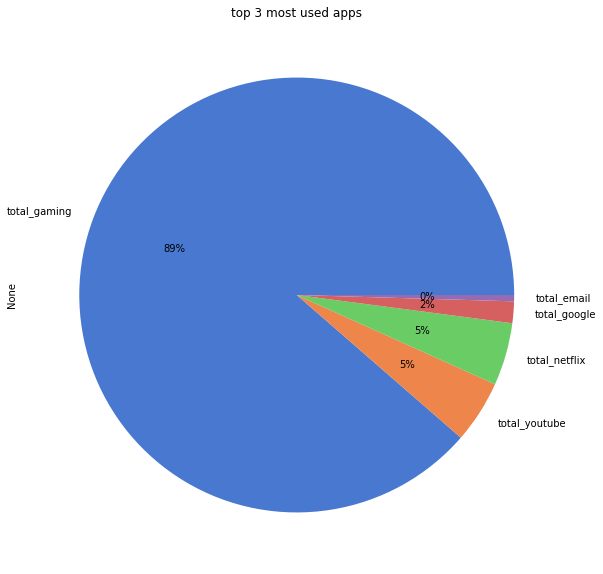

In [52]:
# Generate plot on top 3 most used apps 
fig = plt.figure(figsize = (10,10))
last_num = len(top_3_apps.head(5).values)
colors = sns.color_palette('muted')[0:last_num]
top_3_apps.head(5).plot.pie(grid=True, colors=colors, autopct='%.000f%%')
plt.title('top 3 most used apps')

* The top 3 applications used are
    * Gaming
    * Youtube
    * Netflix
    
As we can see gaming alone have the largest (89%) use per application, next to Youtube (5%) and Netflix (5%).